# Import Liberaries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# Implement UCB

In [4]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d 
sum_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sum_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] +=1
    reward = df.values[n,ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

# Visualize the result

Text(0, 0.5, 'No. of times each ad was selected')

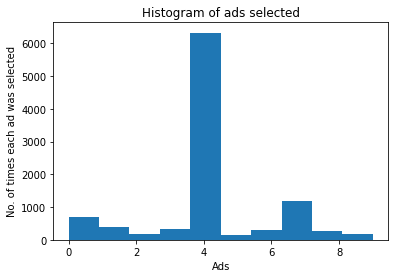

In [5]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No. of times each ad was selected")

# Implement thompson sampling

In [8]:
N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n,ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1 
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward

# Visualize the results

Text(0, 0.5, 'No. of times the ad was selected')

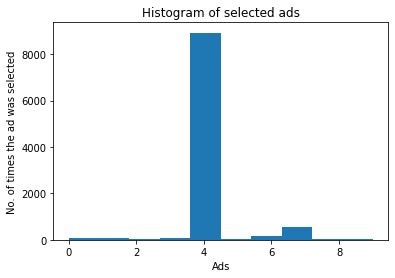

In [9]:
plt.hist(ads_selected)
plt.title("Histogram of selected ads")
plt.xlabel("Ads")
plt.ylabel("No. of times the ad was selected")